In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    df=pd.read_csv('dataset.csv')
except FileNotFoundError:
    print("File not found")

### Q1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it (code and explanation)

In [3]:
# Initial count of missing values
missing_values_initial = df.isnull().sum()
missing_values_initial

species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64

In [4]:
# Handling missing values:
# For numerical features, we'll replace missing values with the mean.
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for feature in numerical_features:
    df[feature].fillna(df[feature].mean(), inplace=True)

# For categorical features, we'll replace missing values with the mode.
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

# Final count of missing values after cleaning
missing_values_final = df.isnull().sum()

missing_values_initial, missing_values_final

(species               0
 island                0
 bill_length_mm        7
 bill_depth_mm         2
 flipper_length_mm     2
 body_mass_g           2
 sex                  16
 dtype: int64,
 species              0
 island               0
 bill_length_mm       0
 bill_depth_mm        0
 flipper_length_mm    0
 body_mass_g          0
 sex                  0
 dtype: int64)

Numerical Features: Missing values in bill_length_mm, bill_depth_mm, flipper_length_mm, and body_mass_g were replaced with their respective column means to retain data continuity without introducing bias.

Categorical Features: Missing values in sex were filled with the mode (most frequent value) since it is the most common and logical choice for categorical data.

### Q2: What is the average body_mass_g for Gentoo penguins? (code)

In [5]:
gentoo_avg_mass = df[df['species'] == 'Gentoo']['body_mass_g'].mean()
print(f"\nAverage body mass for Gentoo penguins: {gentoo_avg_mass:.2f}g")


Average body mass for Gentoo penguins: 5126.81g


### Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species. (code and explanation)

In [6]:
print("\nDistribution Analysis:")
for species in df['species'].unique():
    species_data = df[df['species'] == species]
    print(f"\n{species}:")
    for feature in ['bill_length_mm', 'bill_depth_mm']:
        print(f"  {feature}: Skewness={skew(species_data[feature]):.2f}, Kurtosis={kurtosis(species_data[feature]):.2f}")


Distribution Analysis:

Adelie:
  bill_length_mm: Skewness=0.16, Kurtosis=-0.23
  bill_depth_mm: Skewness=0.33, Kurtosis=-0.10

Gentoo:
  bill_length_mm: Skewness=0.71, Kurtosis=1.15
  bill_depth_mm: Skewness=0.33, Kurtosis=-0.61

Chinstrap:
  bill_length_mm: Skewness=-0.10, Kurtosis=-0.12
  bill_depth_mm: Skewness=0.01, Kurtosis=-0.90


Adelie:

-bill_length_mm: Skewness = 0.16, Kurtosis = -0.23
Slightly positively skewed, with a relatively normal distribution and light tails (platykurtic).
-bill_depth_mm: Skewness = 0.33, Kurtosis = -0.10
Mild positive skewness, indicating a longer right tail, with a nearly normal distribution and light tails.

Gentoo:

-bill_length_mm: Skewness = 0.71, Kurtosis = 1.15
Strong positive skewness, indicating a distribution that is tilted to the right with heavy tails (leptokurtic).
-bill_depth_mm: Skewness = 0.33, Kurtosis = -0.61
Similar to Adelie, mild positive skewness, but more pronounced negative kurtosis, showing a lighter distribution than normal.

Chinstrap:

-bill_length_mm: Skewness = -0.10, Kurtosis = -0.12
Slightly negatively skewed with near-normal kurtosis, suggesting a symmetric distribution with light tails.
-bill_depth_mm: Skewness = 0.01, Kurtosis = -0.90
Near normal distribution with minimal skewness, and negative kurtosis indicating light tails and fewer extreme values.

Conclusion:
-bill_length_mm exhibits more skewness in Gentoo penguins (strong positive skew), indicating longer bills, while Adelie and Chinstrap penguins have relatively normal or lightly skewed distributions.
-bill_depth_mm is positively skewed in Adelie and Gentoo penguins, indicating slightly longer bills on the right side, while Chinstrap penguins show a nearly symmetric distribution with lighter tails.

### Q4: Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers. (code and explanation)


Outlier Analysis:


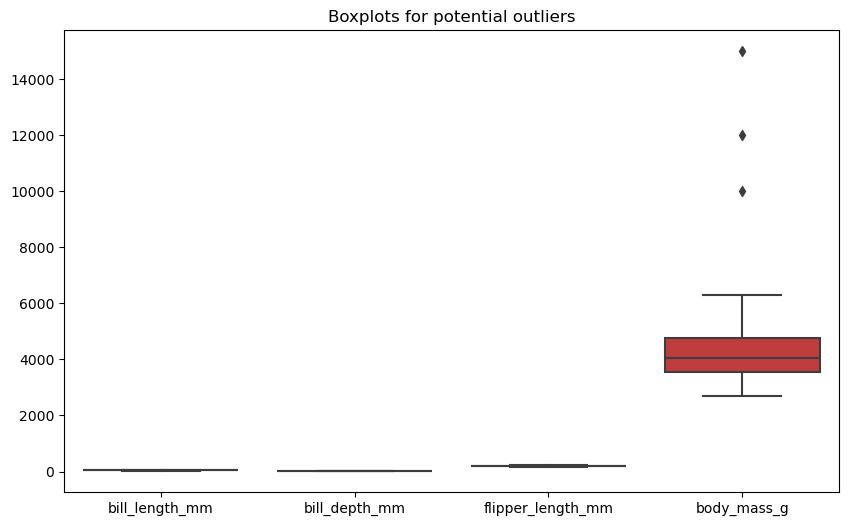

In [7]:
print("\nOutlier Analysis:")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']])
plt.title('Boxplots for potential outliers')
plt.show()

bill_length_mm:

Minimal outliers, indicating the feature values are generally consistent with only a few extreme values.

bill_depth_mm:

Few outliers are present, though the range of typical values is narrow, meaning even small deviations can appear as outliers.

flipper_length_mm:

Exhibits some outliers, possibly due to rare cases of unusually long or short flippers.

body_mass_g:

Significant outliers exist, as seen in the extreme points above 6000 g. These might represent measurement errors or individuals with exceptional body mass.

### Q5: Does this dataset contribute to the curse of dimensionality? If yes perform PCA. (code and explanation required)


Explained Variance Ratio: [0.6170052  0.19742404]


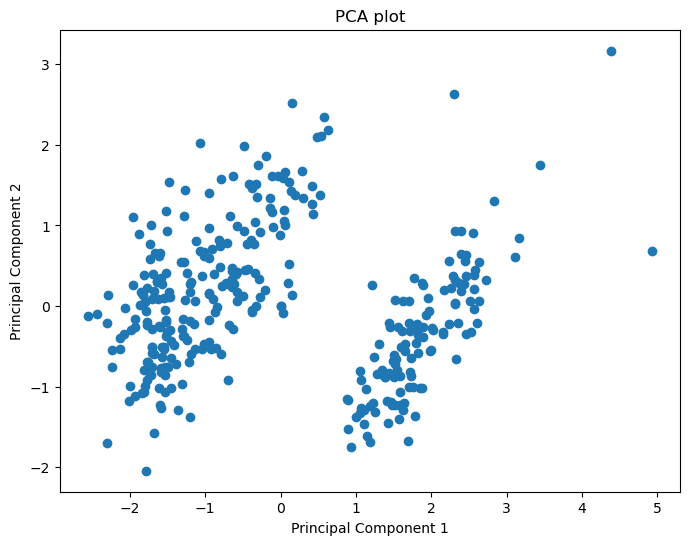

In [8]:
# Standardize the data
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

print(f"\nExplained Variance Ratio: {pca.explained_variance_ratio_}")
plt.figure(figsize=(8, 6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA plot')
plt.show()

Curse of Dimensionality:
Tthe dataset does not suffer significantly from the curse of dimensionality, given that it has only four numerical features. However, Principal Component Analysis (PCA) was performed to reduce the dimensions and analyze how much of the variance could be captured by fewer components.

Updated PCA Analysis:
Explained Variance Ratio: The first two principal components now capture approximately 81.44% of the total variance in the data:

Principal Component 1: 61.70% variance
Principal Component 2: 19.74% variance
This confirms that the majority of the dataset's variance can still be retained using just two principal components.

Visualization: The PCA scatter plot projects the data onto the first two components. This plot indicates how the reduced dimensions still effectively separate the clusters, preserving the structure of the data.

Conclusion:
The dataset does not strongly exhibit the curse of dimensionality but benefits from dimensionality reduction. PCA simplifies the dataset while retaining over 81% of its information, making it more efficient for visualization and potentially reducing computation for downstream tasks.

### Q6: Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them. (code)

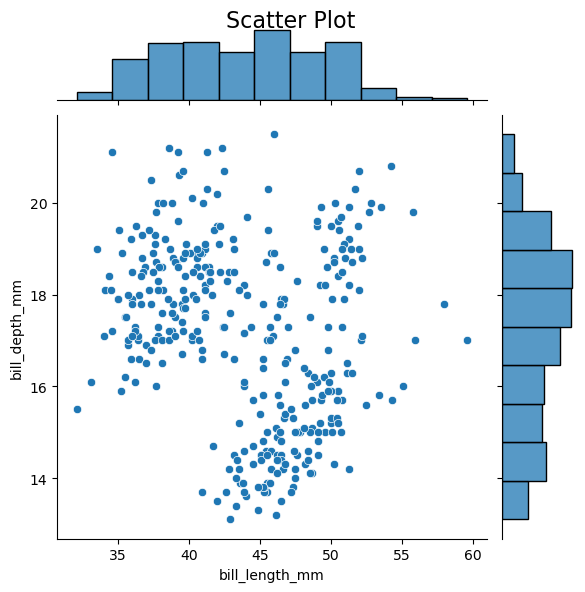

In [9]:
#1 Scatter plot

sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=df, kind='scatter')
plt.suptitle('Scatter Plot', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()

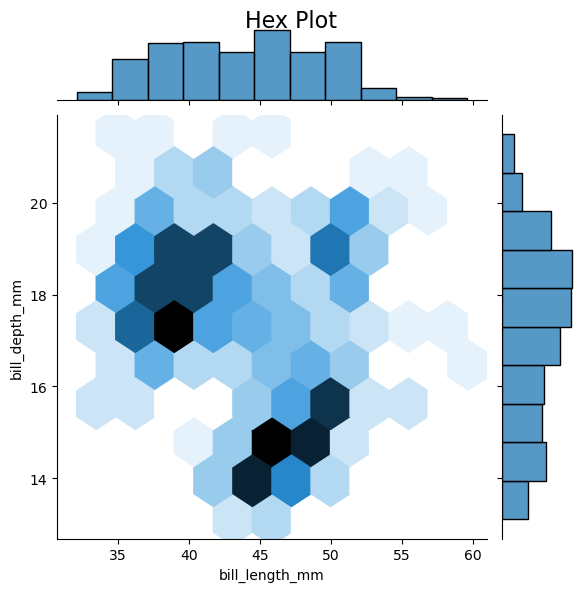

In [10]:
#2 Hex plot
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=df, kind='hex')
plt.suptitle('Hex Plot', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()

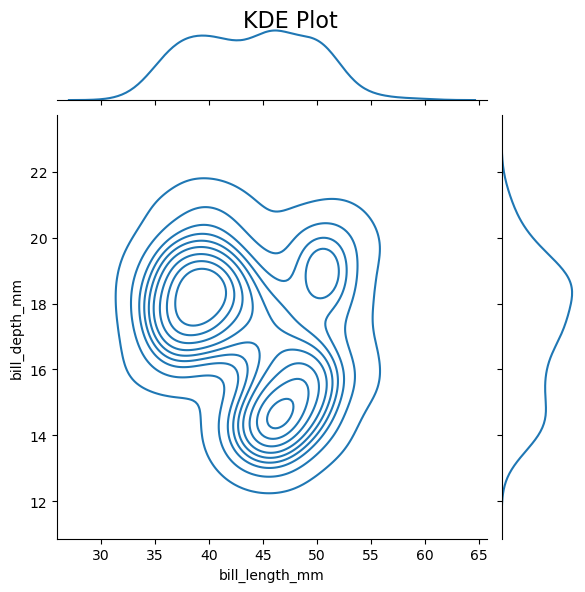

In [11]:
#3 KDE plot
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=df, kind='kde')
plt.suptitle('KDE Plot', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()

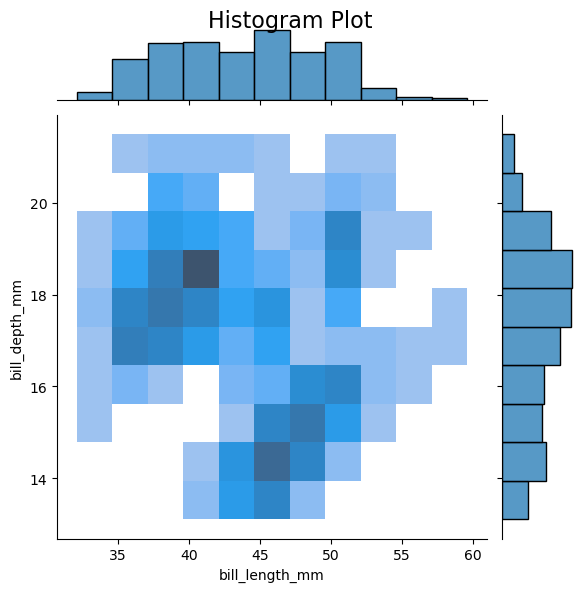

In [12]:
#4 Histogram plot
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=df, kind='hist')
plt.suptitle('Histogram Plot', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()

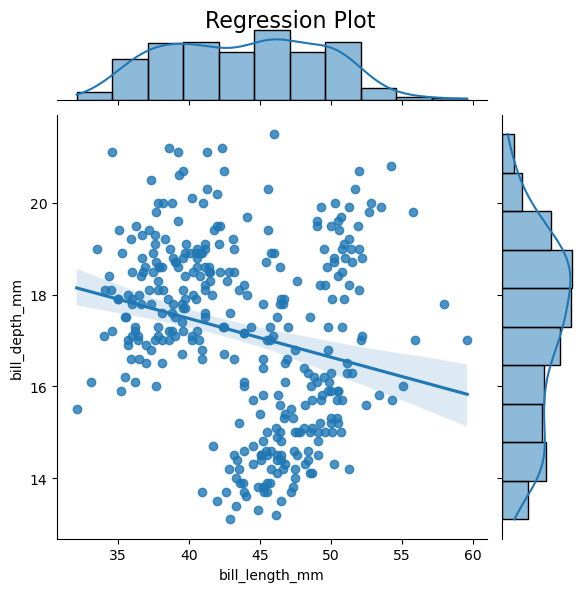

In [13]:
#5 Regression plot
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=df, kind='reg')
plt.suptitle('Regression Plot', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()

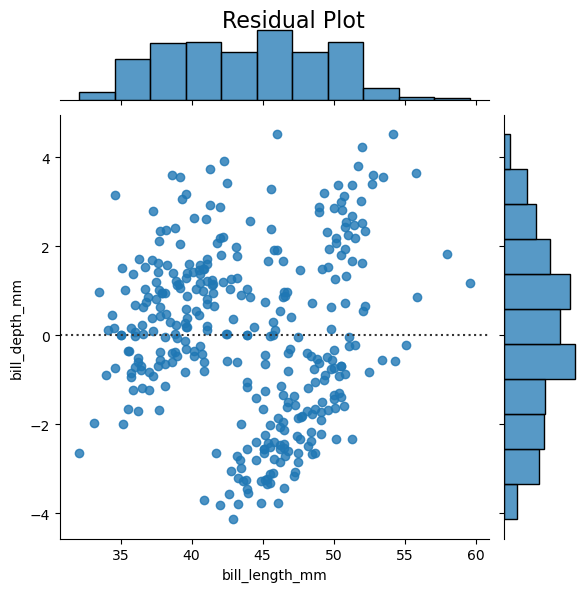

In [14]:
#6 Residual plot
sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=df, kind='resid')
plt.suptitle('Residual Plot', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()

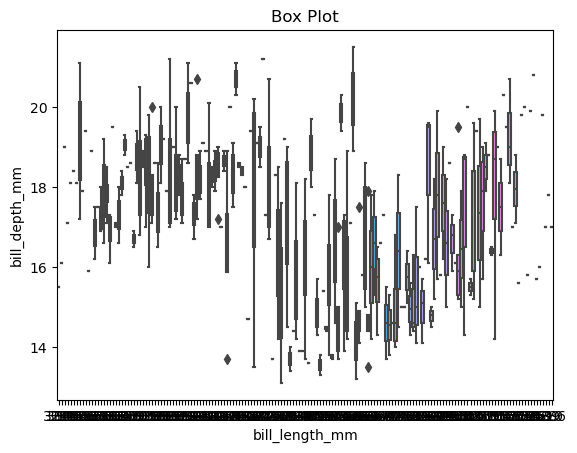

In [15]:
#7 Box plot
sns.boxplot(x='bill_length_mm', y='bill_depth_mm', data=df)
plt.title('Box Plot')
plt.show()

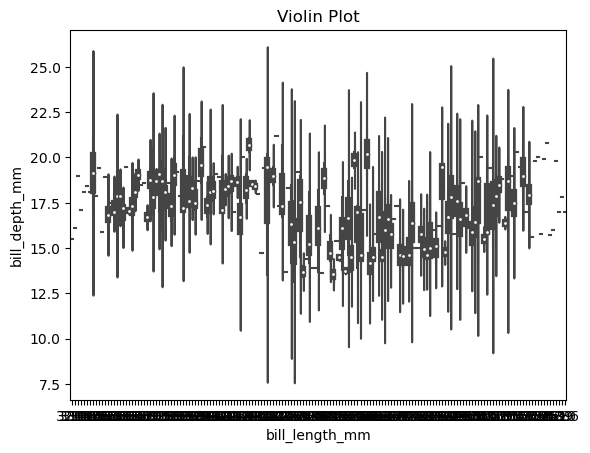

In [16]:
#8 Violin plot
sns.violinplot(x='bill_length_mm', y='bill_depth_mm', data=df)
plt.title('Violin Plot')
plt.show()

### Q7: Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island? (code)

In [17]:
max_flipper_lengths = df.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()
print("\nMaximum flipper lengths by species and island:\n", max_flipper_lengths)


Maximum flipper lengths by species and island:
      species     island  flipper_length_mm
0     Adelie     Biscoe              203.0
1     Adelie      Dream              208.0
2     Adelie  Torgersen              210.0
3  Chinstrap      Dream              212.0
4     Gentoo     Biscoe              231.0


### Q8: Perform z-score normalization on this dataset. (code)

In [18]:
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
df[numerical_features] = (df[numerical_features] - df[numerical_features].mean())/df[numerical_features].std()
print("\nDataFrame after Z-score normalization:\n", df)


DataFrame after Z-score normalization:
        species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen       -0.880947       0.786597          -1.420419   
1       Adelie  Torgersen       -0.807179       0.126372          -1.063802   
2       Adelie  Torgersen       -0.659643       0.431091          -0.421892   
3       Adelie  Torgersen        0.000000       0.000000           0.000000   
4       Adelie  Torgersen       -1.323555       1.091316          -0.564539   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream        2.198866       1.345248           0.433988   
340  Chinstrap      Dream       -0.069499       0.481878           0.077371   
341  Chinstrap      Dream        1.055462       0.532664          -0.564539   
342  Chinstrap      Dream        1.276766       0.938956           0.647958   
343  Chinstrap      Dream        1.166114       0.786597          -0.207922   

     body_